In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler 

In [152]:
test_set = pd.read_csv('dataset/test_set_features.csv')
features = pd.read_csv('dataset/training_set_features.csv')
labels = pd.read_csv('dataset/training_set_labels.csv')

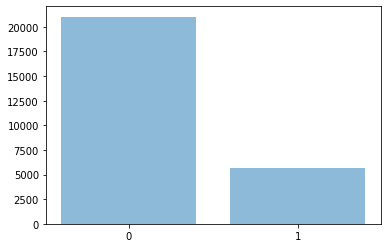

In [153]:
h1n1_vacc_dist = labels.groupby('h1n1_vaccine').size()
plt.bar(['0','1'],h1n1_vacc_dist, align='center', alpha=0.5)
plt.show()


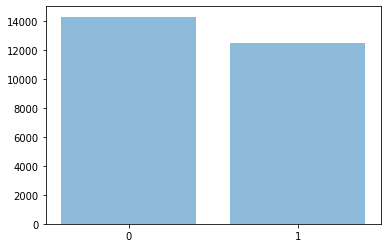

In [84]:
seasonal_vacc_dist = labels.groupby('seasonal_vaccine').size()
plt.bar(['0','1'],seasonal_vacc_dist, align='center', alpha=0.5)
plt.show()

In [154]:
na_feature = features.isna().sum()
na_feature

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [155]:
na_test_set = test_set.isna().sum()
na_test_set

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [156]:
# For float fill missing values with the mean
features = features.fillna(features.mean(numeric_only= True))
features = round(features)

# For string fill missing value with 'No Category'

features = features.fillna('NULL')

In [157]:
# For float fill missing values with the mean
test_set = test_set.fillna(test_set.mean(numeric_only= True))
test_set = round(test_set)

# For string fill missing value with 'No Category'

test_set = test_set.fillna('NULL')

In [158]:
enc = LabelEncoder()

In [160]:
features.age_group = enc.fit_transform(features.age_group)
test_set.age_group = enc.transform(test_set.age_group)

features.education = enc.fit_transform(features.education)
test_set.education = enc.fit_transform(test_set.education)

features.race = enc.fit_transform(features.race)
test_set.race = enc.fit_transform(test_set.race)

features.sex = enc.fit_transform(features.sex)
test_set.sex = enc.fit_transform(test_set.sex)

features.income_poverty = enc.fit_transform(features.income_poverty)
test_set.income_poverty = enc.fit_transform(test_set.income_poverty)

features.marital_status = enc.fit_transform(features.marital_status)
test_set.marital_status = enc.fit_transform(test_set.marital_status)

features.rent_or_own = enc.fit_transform(features.rent_or_own)
test_set.rent_or_own = enc.fit_transform(test_set.rent_or_own)

features.employment_status = enc.fit_transform(features.employment_status)
test_set.employment_status = enc.fit_transform(test_set.employment_status)

features.hhs_geo_region = enc.fit_transform(features.hhs_geo_region)
test_set.hhs_geo_region = enc.fit_transform(test_set.hhs_geo_region)

features.census_msa = enc.fit_transform(features.census_msa)
test_set.census_msa = enc.fit_transform(test_set.census_msa)

features.employment_industry = enc.fit_transform(features.employment_industry)
test_set.employment_industry = enc.fit_transform(test_set.employment_industry)

features.employment_occupation = enc.fit_transform(features.employment_occupation)
test_set.employment_occupation = enc.fit_transform(test_set.employment_occupation)

In [161]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [162]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26708 non-null  float64
 2   h1n1_knowledge               26708 non-null  float64
 3   behavioral_antiviral_meds    26708 non-null  float64
 4   behavioral_avoidance         26708 non-null  float64
 5   behavioral_face_mask         26708 non-null  float64
 6   behavioral_wash_hands        26708 non-null  float64
 7   behavioral_large_gatherings  26708 non-null  float64
 8   behavioral_outside_home      26708 non-null  float64
 9   behavioral_touch_face        26708 non-null  float64
 10  doctor_recc_h1n1             26708 non-null  float64
 11  doctor_recc_seasonal         26708 non-null  float64
 12  chronic_med_condition        26708 non-null  float64
 13  child_under_6_mo

In [163]:
labels = labels.drop(columns=['respondent_id'])
labels

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


In [164]:
labels_h1n1 = pd.DataFrame()
labels_h1n1['labels'] = labels['h1n1_vaccine']
labels_h1n1

,labels
0,0
1,0
2,0
3,0
4,0
...,...
26702,0
26703,0
26704,0
26705,0


In [165]:
labels_seasonal = pd.DataFrame()
labels_seasonal['labels'] = labels['seasonal_vaccine']
labels_seasonal

,labels
0,0
1,1
2,0
3,1
4,0
...,...
26702,0
26703,0
26704,1
26705,0


C:\Users\faris\AppData\Local\Temp\ipykernel_14580\3775587756.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(features,labels_h1n1)


[0.04195219 0.0317821  0.02636476 0.00856831 0.0176479  0.01025002
 0.01135227 0.01729126 0.01800749 0.01775367 0.11422126 0.02420453
 0.01814752 0.01079453 0.02193274 0.00665929 0.05535723 0.06113733
 0.03145984 0.02877075 0.04330348 0.02953571 0.03265309 0.02953065
 0.01975417 0.02113219 0.02789921 0.01888159 0.02016175 0.01678015
 0.03924738 0.0300286  0.0256265  0.02257342 0.02426097 0.02497615]


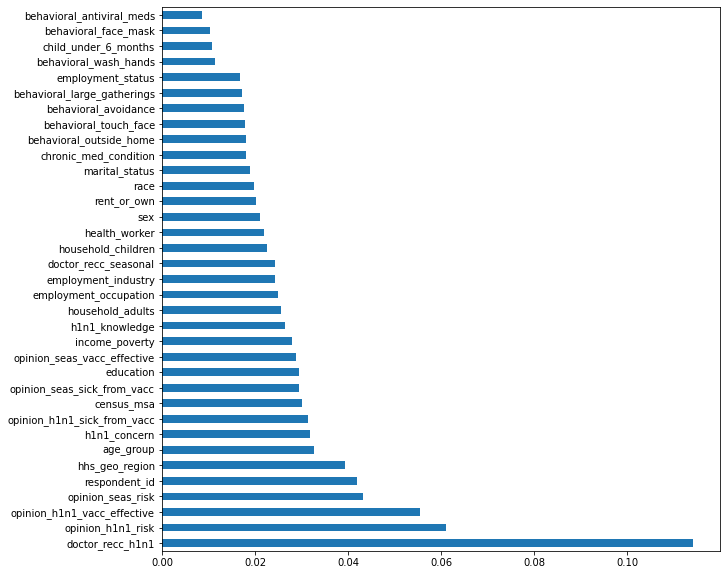

In [96]:
model = ExtraTreesClassifier()
model.fit(features,labels_h1n1)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

[0.03754154 0.02868099 0.02503763 0.00712457 0.01657256 0.00851686
 0.01204355 0.0175223  0.01746366 0.01642831 0.01866304 0.0815747
 0.01842546 0.00933751 0.01515251 0.0089448  0.03186888 0.0330916
 0.02773946 0.07968756 0.09299393 0.03071608 0.06079004 0.02835722
 0.01998889 0.01953704 0.02583717 0.01840286 0.01896343 0.01681067
 0.03505534 0.02730903 0.02419776 0.0214533  0.02421133 0.02395844]


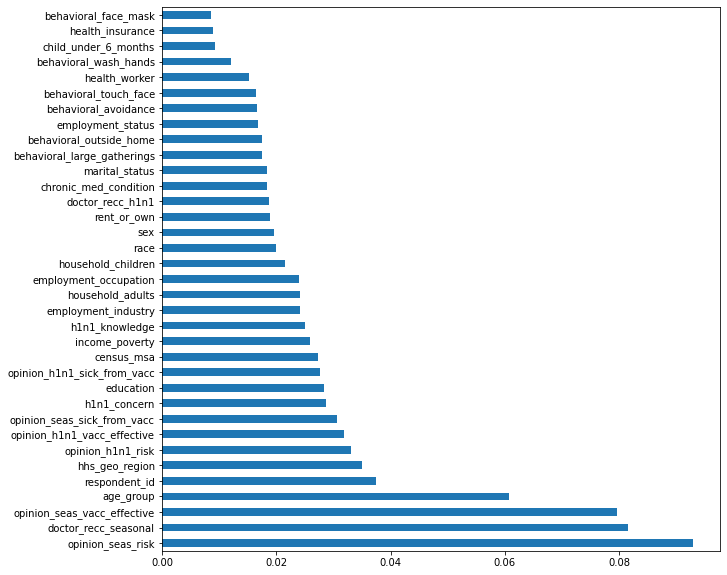

In [23]:
model = ExtraTreesClassifier()
model.fit(features,labels_seasonal)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

In [167]:
features_h1n1 = features.drop(columns=['doctor_recc_h1n1',
                                       'opinion_h1n1_risk',
                                       'opinion_h1n1_vacc_effective',
                                       'opinion_seas_risk',
                                         'respondent_id',
                                         'hhs_geo_region'])

test_set_h1n1 = test_set.drop(columns=['doctor_recc_h1n1',
                                       'opinion_h1n1_risk',
                                       'opinion_h1n1_vacc_effective',
                                       'opinion_seas_risk',
                                         'respondent_id',
                                         'hhs_geo_region'])

features_seasonal = features.drop(columns=['opinion_seas_risk',
                                           'doctor_recc_seasonal',
                                           'opinion_seas_vacc_effective',
                                           'age_group',
                                           'respondent_id',
                                           'hhs_geo_region',
                                           'opinion_h1n1_risk',
                                           'opinion_h1n1_vacc_effective',
                                           'opinion_seas_sick_from_vacc',
                                           'h1n1_concern',
                                           'education',
                                           'opinion_h1n1_sick_from_vacc',
                                           'census_msa'])

test_set_seasonal = test_set.drop(columns=['opinion_seas_risk',
                                           'doctor_recc_seasonal',
                                           'opinion_seas_vacc_effective',
                                           'age_group',
                                           'respondent_id',
                                           'hhs_geo_region',
                                           'opinion_h1n1_risk',
                                           'opinion_h1n1_vacc_effective',
                                           'opinion_seas_sick_from_vacc',
                                           'h1n1_concern',
                                           'education',
                                           'opinion_h1n1_sick_from_vacc',
                                           'census_msa'])

In [168]:
oversample_h1n1 = RandomOverSampler(sampling_strategy='auto')
oversample_seasonal = RandomOverSampler(sampling_strategy='auto')

features_h1n1_ovsmpld, labels_h1n1_ovsmpld = oversample_h1n1.fit_resample(features_h1n1, labels_h1n1)
features_seasonal_ovsmpld, labels_seasonal_ovsmpld = oversample_h1n1.fit_resample(features_seasonal, labels_seasonal)

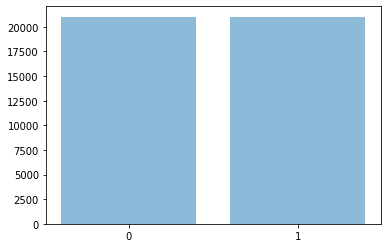

In [169]:
h1n1_vacc_dist_oversampled = labels_h1n1_ovsmpld.groupby('labels').size()
plt.bar(['0','1'],h1n1_vacc_dist_oversampled, align='center', alpha=0.5)
plt.show()

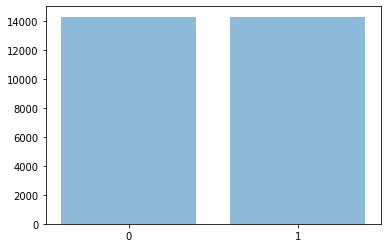

In [170]:
seasonal_vacc_dist_oversampled = labels_seasonal_ovsmpld.groupby('labels').size()
plt.bar(['0','1'],seasonal_vacc_dist_oversampled, align='center', alpha=0.5)
plt.show()

In [171]:
features_h1n1_ovsmpld.to_csv('cleaned_features_h1n1.csv', index = False)
labels_h1n1_ovsmpld.to_csv('cleaned_labels_h1n1.csv', index = False)
test_set_h1n1.to_csv('cleaned_test_set_h1n1.csv', index = False)

features_seasonal_ovsmpld.to_csv('cleaned_features_seasonal.csv', index = False)
labels_seasonal_ovsmpld.to_csv('cleaned_labels_seasonal.csv', index = False)
test_set_seasonal.to_csv('cleaned_test_set_seasonal.csv', index = False)

In [173]:
# CHECKPOINT

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report
from xgboost import XGBClassifier



In [174]:
features_h1n1_ovsmpld = pd.read_csv('cleaned_features_h1n1.csv')
labels_h1n1_ovsmpld = pd.read_csv('cleaned_labels_h1n1.csv')
test_set_h1n1 = pd.read_csv('cleaned_test_set_h1n1.csv')

features_seasonal = pd.read_csv('cleaned_features_seasonal.csv')
labels_seasonal = pd.read_csv('cleaned_labels_seasonal.csv')
test_set_seasonal = pd.read_csv('cleaned_test_set_seasonal.csv')

In [175]:
x_h1n1 = features_h1n1_ovsmpld
y_h1n1 = labels_h1n1_ovsmpld

x_seasonal = features_seasonal
y_seasonal = labels_seasonal

In [176]:
x_train_h1n1, x_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(x_h1n1,y_h1n1, test_size = 0.3, random_state = 23)
x_train_seas, x_test_seas, y_train_seas, y_test_seas = train_test_split(x_seasonal,y_seasonal, test_size = 0.3, random_state = 23)

In [177]:
# Initializing

model_RF_h1n1 = RandomForestClassifier(verbose=2, n_estimators= 1000)

# # Training

model_RF_h1n1.fit(x_train_h1n1,y_train_h1n1)



C:\Users\faris\AppData\Local\Temp\ipykernel_14580\3339783010.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF_h1n1.fit(x_train_h1n1,y_train_h1n1)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   48.6s finished


RandomForestClassifier(n_estimators=1000, verbose=2)

In [180]:
# Initializing

model_RF_seasonal = RandomForestClassifier(verbose=2, n_estimators= 1000)

# # Training

model_RF_seasonal.fit(x_train_seas,y_train_seas)



C:\Users\faris\AppData\Local\Temp\ipykernel_14580\3761674972.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF_seasonal.fit(x_train_seas,y_train_seas)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   27.2s finished


RandomForestClassifier(n_estimators=1000, verbose=2)

In [179]:
# Predicting

y_pred_h1n1 = model_RF_h1n1.predict(x_test_h1n1)

# Testing
RF = accuracy_score(y_test_h1n1,y_pred_h1n1)
RF

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.4s finished


0.9217908082408874

In [182]:
# Predicting

y_pred_seas = model_RF_seasonal.predict(x_test_seas)

# Testing
RF = accuracy_score(y_test_seas,y_pred_seas)
RF

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.1s finished


0.6634750116767866

In [72]:
result_h1n1 = model_RF_h1n1.predict(test_set_h1n1)
result_seasonal = model_RF_seasonal.predict(test_set_seasonal)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.1s finished


In [123]:
df = pd.DataFrame(result_h1n1, columns=["h1n1_vaccine"])
df

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
26703,0
26704,0
26705,0
26706,0


In [124]:
df['seasonal_vaccine'] = result_seasonal
df

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
26703,0,1
26704,0,0
26705,0,0
26706,0,0


In [125]:
test_set = pd.read_csv('dataset/test_set_features.csv')

In [126]:
test_set.loc[:,"respondent_id"]

0        26707
1        26708
2        26709
3        26710
4        26711
         ...  
26703    53410
26704    53411
26705    53412
26706    53413
26707    53414
Name: respondent_id, Length: 26708, dtype: int64

In [127]:
df_respondent = test_set.respondent_id
df_respondent =  pd.DataFrame(df_respondent, columns=["respondent_id"])
df_respondent

,respondent_id
0,26707
1,26708
2,26709
3,26710
4,26711
...,...
26703,53410
26704,53411
26705,53412
26706,53413


In [128]:
df_respondent["h1n1_vaccine"]= df["h1n1_vaccine"] 
df_respondent["seasonal_vaccine"]= df["seasonal_vaccine"] 
df_respondent


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0,0
1,26708,0,0
2,26709,0,1
3,26710,0,1
4,26711,0,0
...,...,...,...
26703,53410,0,1
26704,53411,0,0
26705,53412,0,0
26706,53413,0,0


In [129]:
df_respondent.to_csv("bismillah_2.csv", index=False) 